In [1]:
import pandas as pd
import numpy as np

from src_analyze.data_inspection import DataInspector, DataInspectionStrategy, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from src_analyze.missing_values_analysis import MissingValuesAnalysisTemplate, SimpleMissingValuesAnalysis
from src_analyze.univariate_analysis import UnivariateInspector, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from src_analyze.bivariate_analysis import BivariateInspector, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from src_analyze.multivariate_analysis import SimpleMultivariateAnalysis

In [2]:
# Loading data
data_path = "../extracted_data/AmesHousing.csv"
data = pd.read_csv(data_path)

## 1. Basic Data Inspection 

In [3]:
# Data Type Inspection

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df=data)

Data types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-nu

In [4]:
# Summary Statistics Inspection

data_inspector.set_strategy(strategy=SummaryStatisticsInspectionStrategy())

data_inspector.execute_inspection(df=data)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     

### Data Insights

- There are 2930 records with 82 features
- There are 28 columns with int64 datatype, 43 columns with object datatype and 11 columns have values of float64 datatype.
- Data contains both Numerical and Categorical features, like:
    - **Numerical features:** e.g: MS SubClass, Lot Frontage, Lot Area, Mo Sold, Yr sold etc.
    - **Categorical features:** e.g:  MS Zoning, Street, Lot Shape, Sale Type, Sale Condition etc.
    
    
The statictics is as follows:

1. **Numerical Features**
    - The `SalePrice` has a mean value of **\\$180796** and has a standard deviation of **\\$79887**, which shows that there is a greater spread in the sale price values.
    - The `Lot Area` has max value of **215245 sq meters**, indicting very large property. It has mean value of **10147 sq meters**, which shows that on average we have relatively small sized houses.
    - For `Year Built` column shows minimum of 1872 and maximum of 2010, indicating a vast dataset with houses extremely old and relatively new too.
    - The `Overall Qual` seems to be ordinal with 1 being poor and 10 being good quality. It has a mean value of **6.1**, that means that most houses are relatively good in quality.



            
2. **Categorical Features**
    - `Neighbourhood` has **28** unique value count, with the most frequent value **NAmes**. This categorical column being large unique value count may suggest greater dominance of some neighbourhoods.
    - Several features related to garage, fence, land etc. vary significantly and ca have greater impact on SalePrice.
    - `Alley` have large number of null values.
    - `Street` has unique count of 2, with **Pave** being dominant.
    - `Land Contour` is mostly **Lvl**.
    - `Sale Condition` is majorly **normal**.

## 2. Missing Value Analysis 

Missing Values count:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Visualizing the missing values...


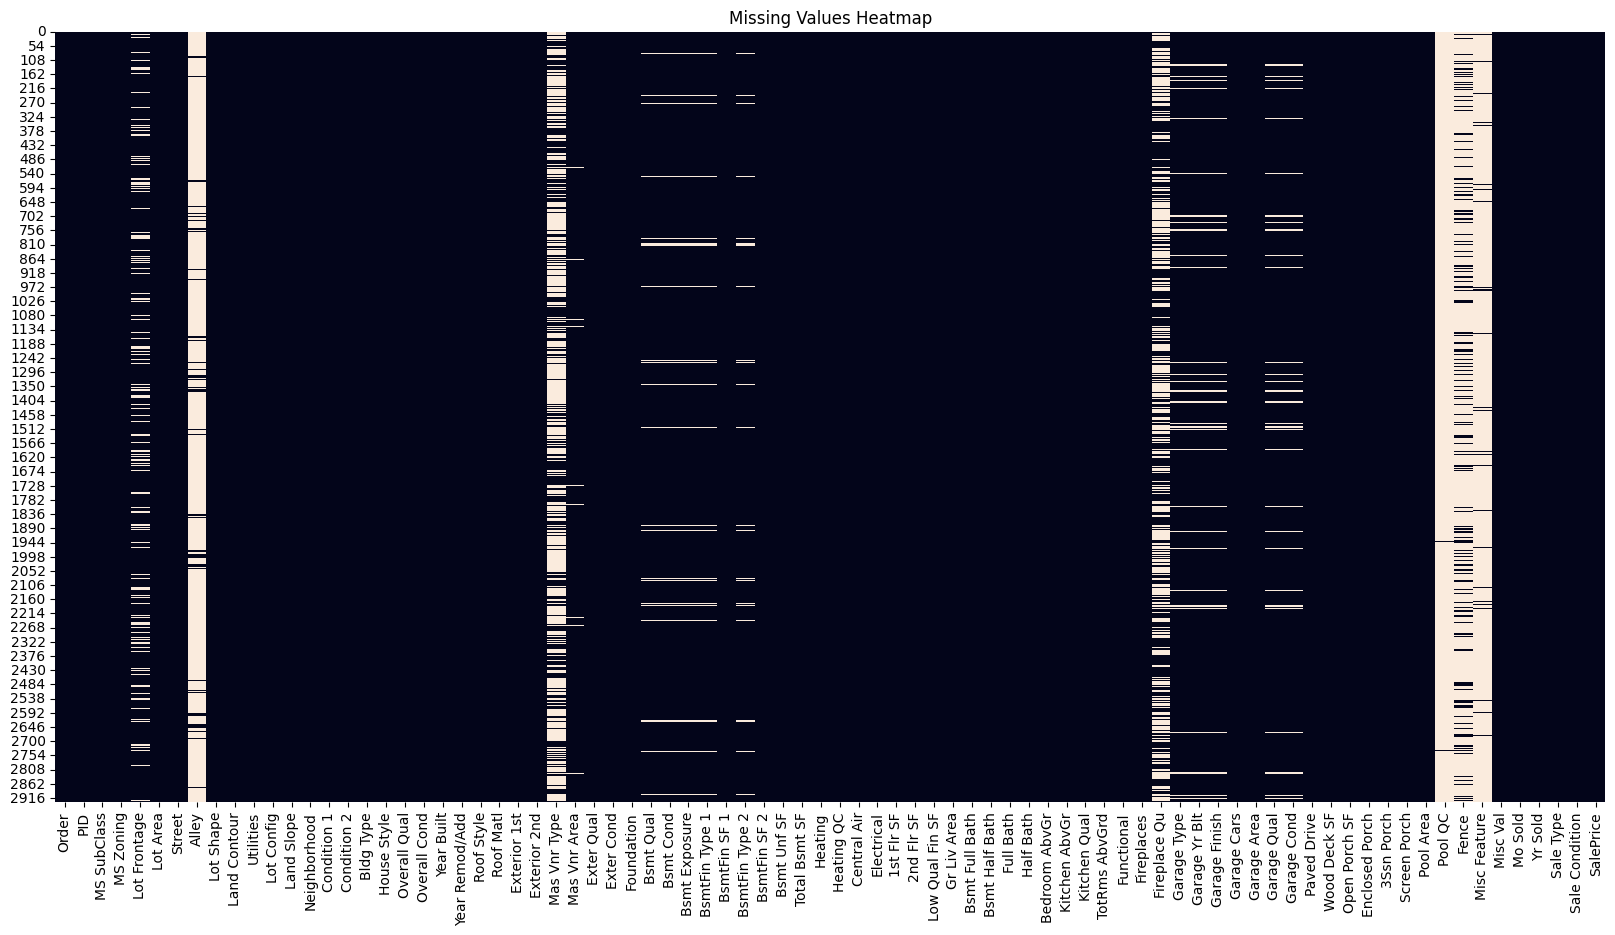

In [5]:
missing_values_analyser = SimpleMissingValuesAnalysis()
missing_values_analyser.analyze(df=data)

#### Missing Values Analysis

- In the heatmap, the columns in dark shows non-null values, while light shade indicates the presence of missing values.
- Looking at missing values count and heatmap, it can be observed that columns like `Alley`, `Pool QC`, `Misc Feature`, `Fence`, `Fireplace Qu`, `Mas Vnr Type` have moslty rows with missing values (more than ~60%).
- The columns like `Lot Frontage`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` have few rows with missing values (upto ~6%).
- There are some other variables in data that has only 1-2 rows of missing data (~0.1% or less).


#### Missing Values Pattern
- For columns like `Alley`, `Pool QC`, `Misc Feature`, `Fence` and `Mas Vnr Type`, we can see a clear clusters, that indicates either that data collection error or it can to attributed to the cause that these features might not be applicable to some cases and left empty while filling out houses detail. 
- While the other columns with missing values show random missing value patterns.

## 3. Univariate Analysis

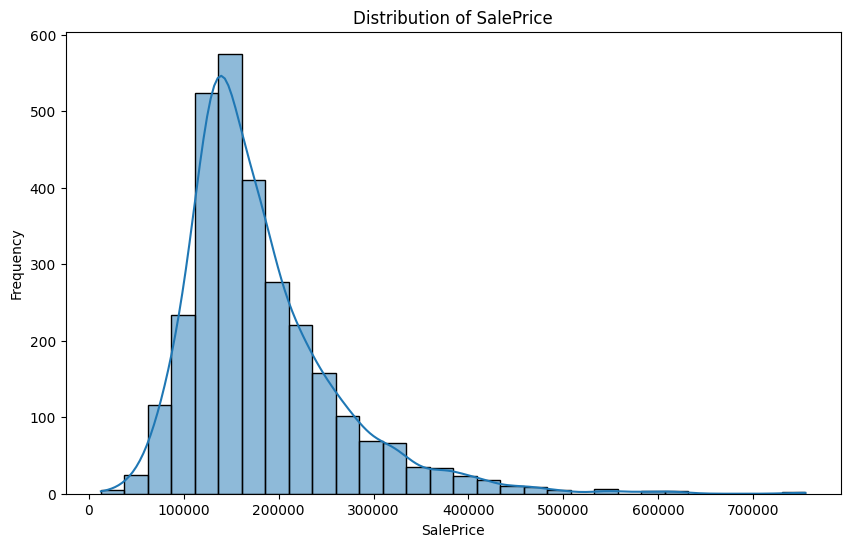

In [6]:
univariate_analyzer = UnivariateInspector(strategy=NumericalUnivariateAnalysis())
univariate_analyzer.perform_analysis(df=data, feature='SalePrice')

#### SalePrice Distribution

- The distribution of `SalePrice` is positively skewed, with the majority of houses price range between **\$100K** and **\$250K**.
- The highest frequency is around **\$160K**.
- The distribution shows that majority of houses in the dataset are affordable with few expensive properties. The tail on right side shows small number of expensive houses.
- The skewness needs consideration, as it can impact model performace. We might consider log transformations to normalize the distribution for better modeling.

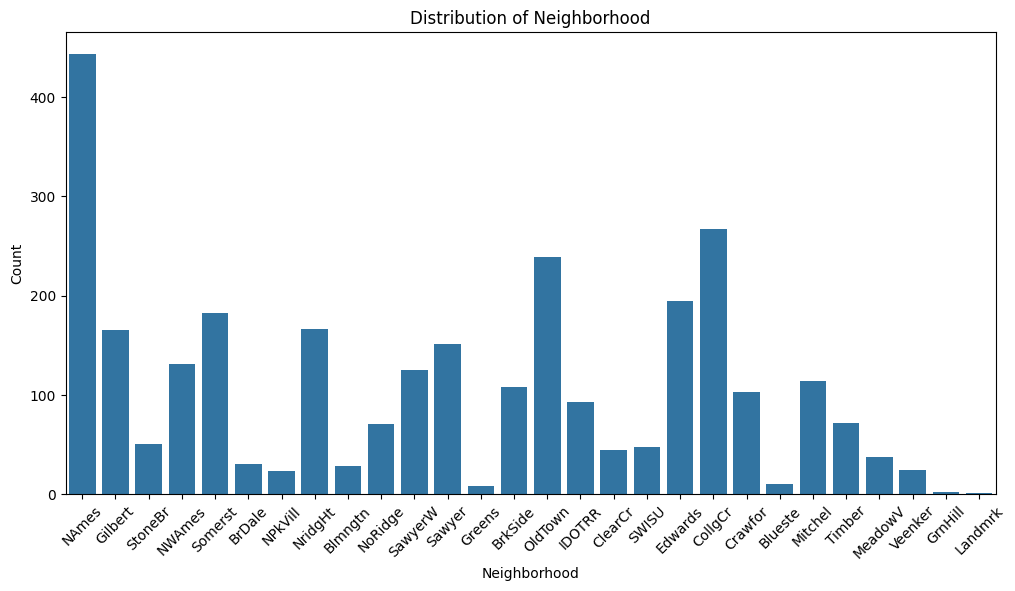

In [7]:
univariate_analyzer.set_strategy(strategy=CategoricalUnivariateAnalysis())
univariate_analyzer.perform_analysis(df=data, feature="Neighborhood")

#### Neighborhood Distribution

- Analyzing the distribution, the most common neighborhood is **NAmes** followed by **CollgCr** and **OldTown**. Some of the neighborhoods have very few observations.
- The common neighborhood could significantly impact the house pricing. The less common neighbourhoods can be grouped into similiar neighbourhoods or handle with some other encoding technique to make modeling less prone to overfitting.

## 3. Bivariate Analysis

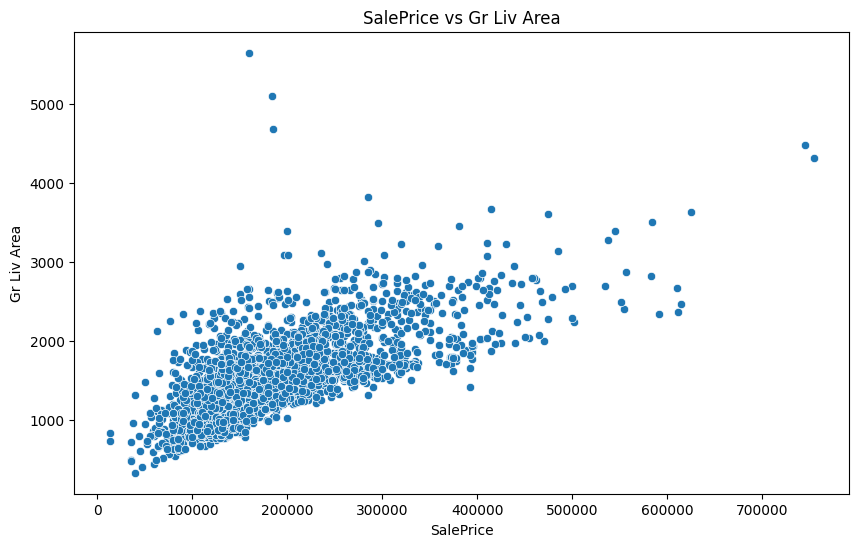

In [8]:
bivariate_analyzer = BivariateInspector(strategy=NumericalVsNumericalAnalysis())
bivariate_analyzer.perform_analysis(df=data, feature_1='SalePrice', feature_2='Gr Liv Area')

#### SallePrice vs Gr Liv Area

- The distribution shows that houses with large above the gound living area has higher price, giving a positive correlation.
- There are few outliers too, that needs to be further analyzed before modeling.

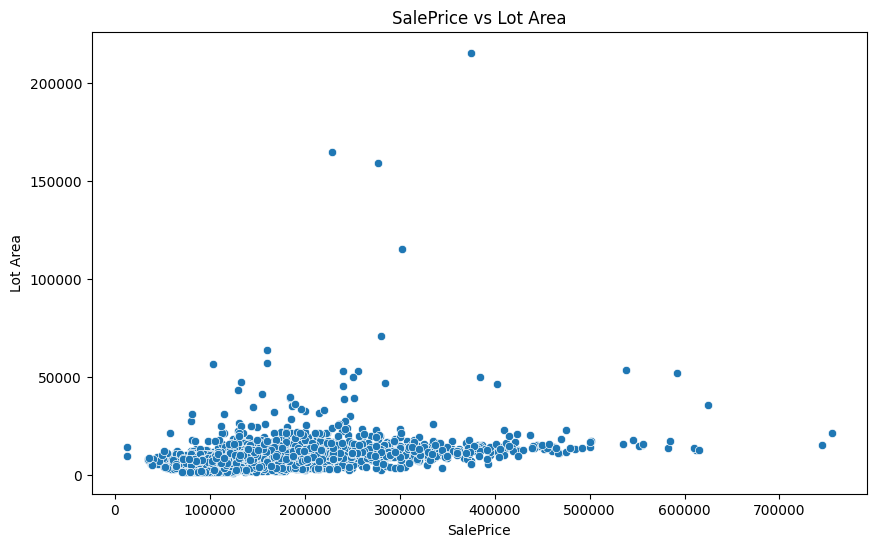

In [9]:
bivariate_analyzer.perform_analysis(df=data, feature_1='SalePrice', feature_2='Lot Area')

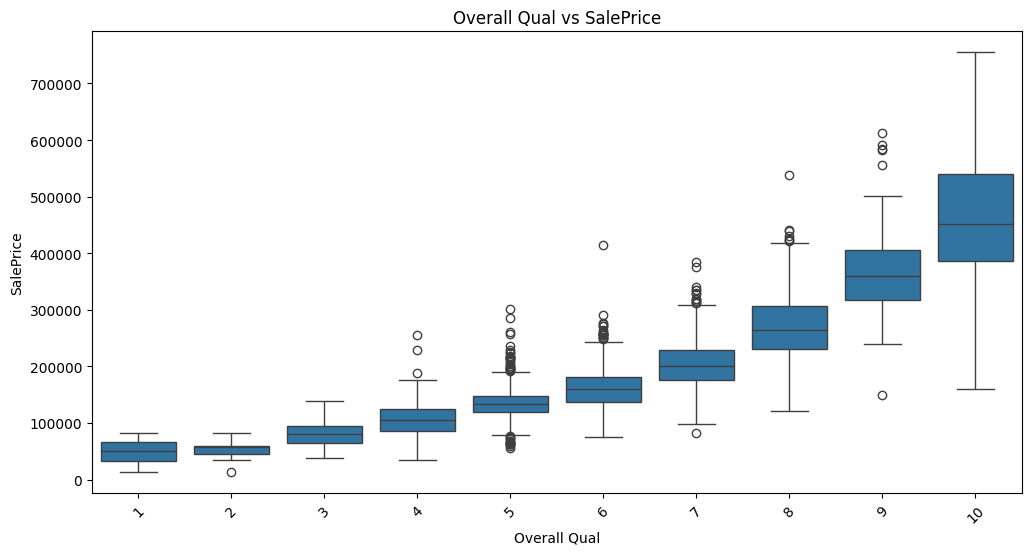

In [10]:
bivariate_analyzer.set_strategy(strategy=CategoricalVsNumericalAnalysis())
bivariate_analyzer.perform_analysis(df=data, feature_1='Overall Qual', feature_2='SalePrice')

#### Overall Qual vs SalePrice

- The trends shows that good quality houses have higher selling prices.
- There is a bit of variability in some of the quality categories, that ca be attributed to other house features.

## 4. Multivariate Analysis 

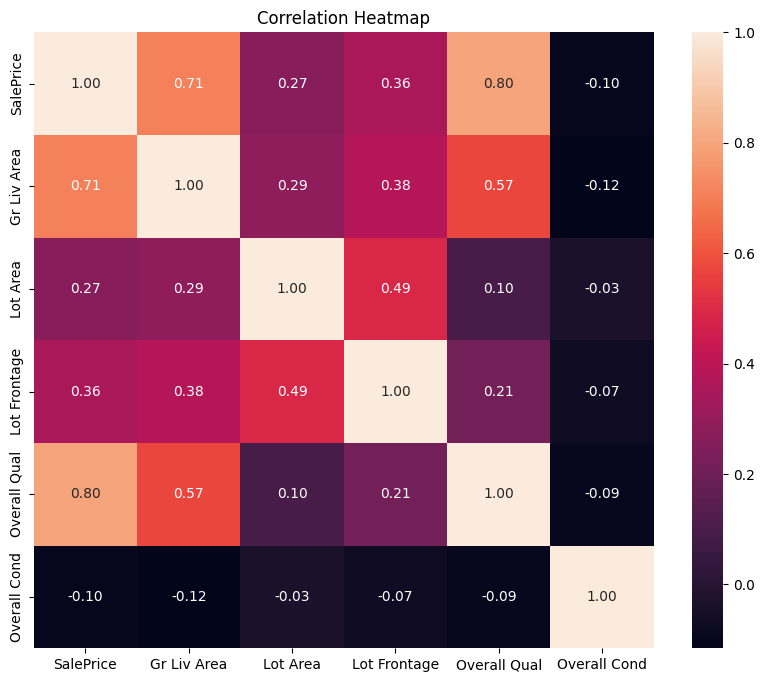

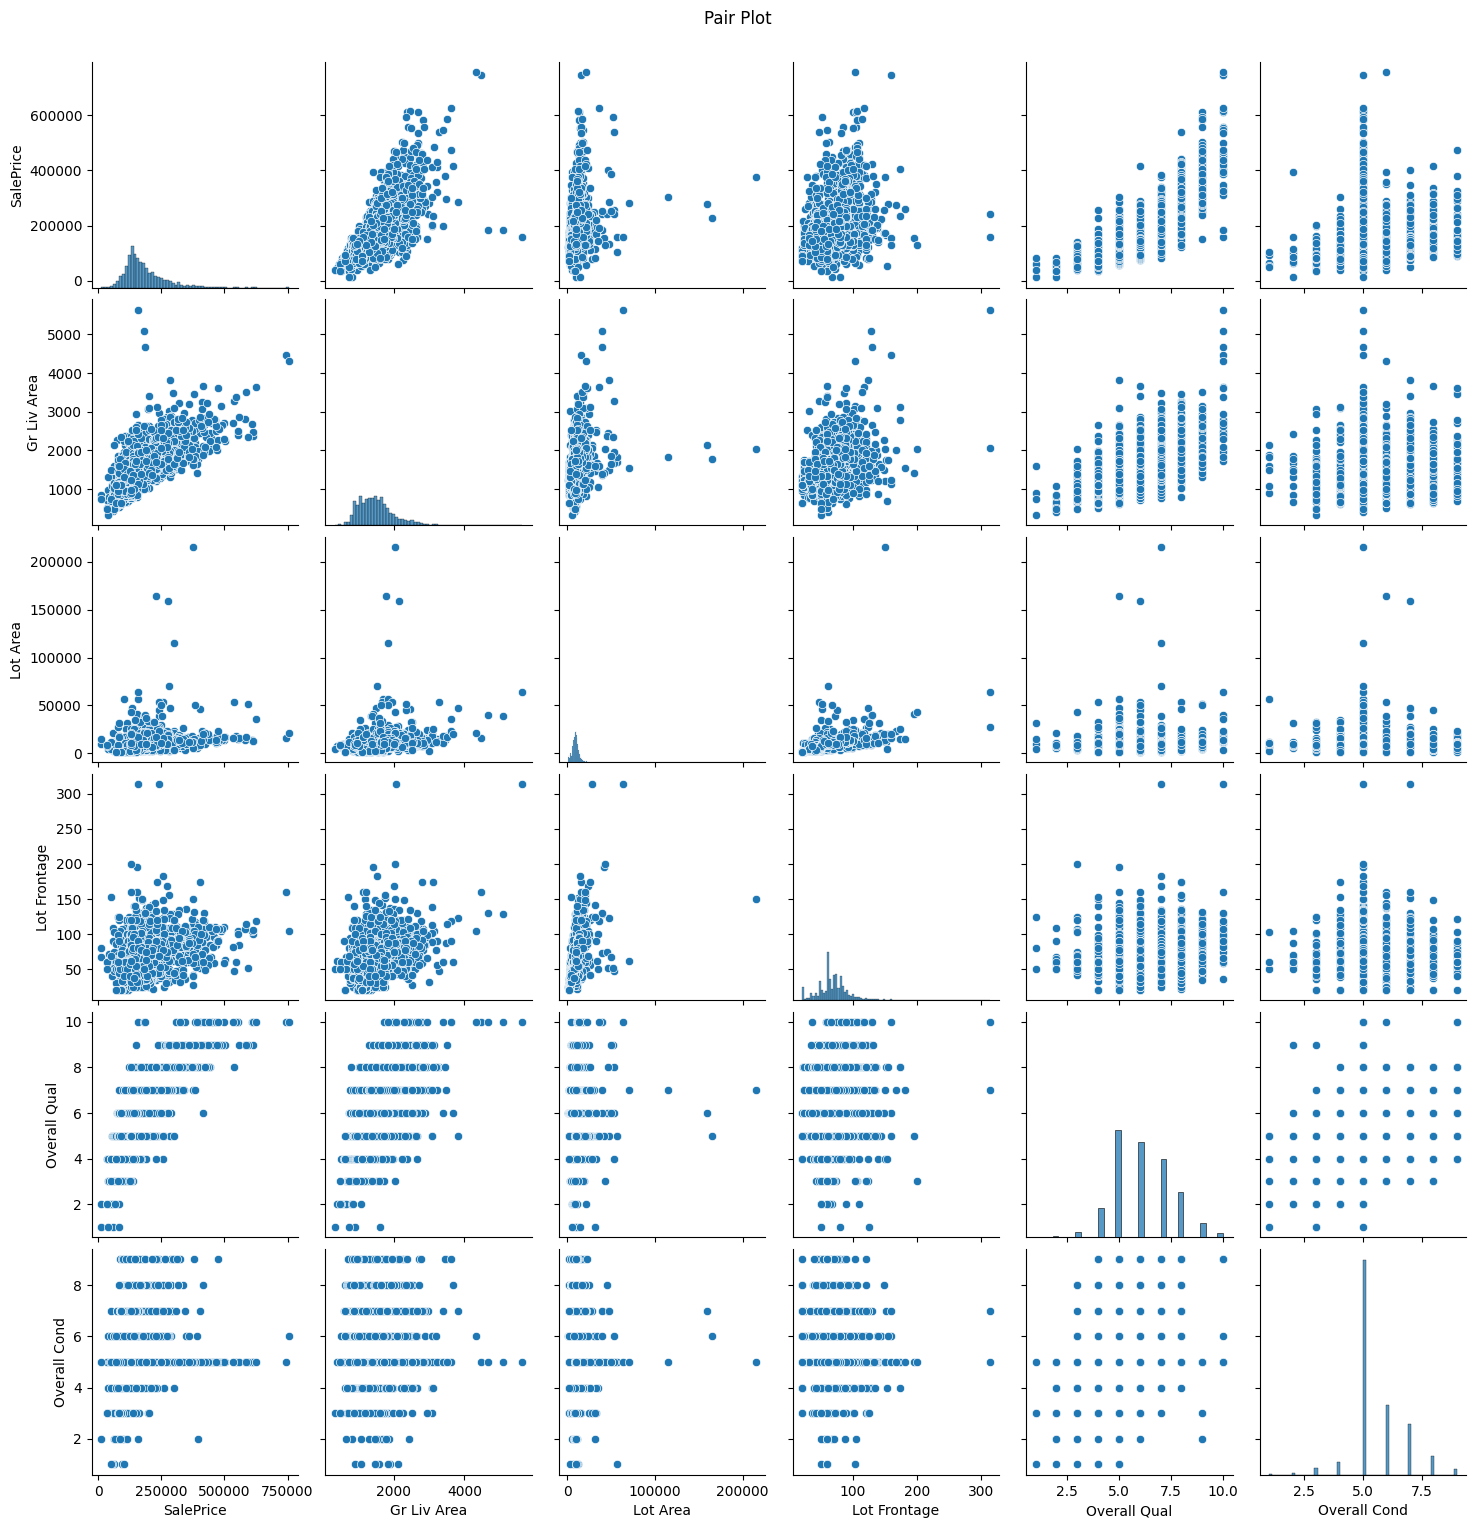

In [12]:
multivariate_analyzer = SimpleMultivariateAnalysis()

selected_features = ['SalePrice', 'Gr Liv Area', 'Lot Area', 'Lot Frontage', 'Overall Qual', 'Overall Cond']

multivariate_analyzer.analyze(df=data[selected_features])

#### Insights

- `Overall Qual` has a strong correlation with `SalePrice`, making it a strong predictor of the price.
- `Gr Liv Area` has a strong positive correlation with the `SalePrice` which suggest that it is a key price predictor feature.
- `Lot Area` also positively correlated with the `SalePrice` but not as strongly correlated as the previous two.
- `Overall Cond` is poorly correlated with the `SalePrice`.
- Some variables show ordinal nature, and can be encoded as categorical with nominal or ordinal settings.


#### Multicollinearity
- `Overall Qual` and `Gr Liv Area` shows a significant correlation among them. Similiarly, `Lot Frontage` and `Lot Area` shows postive correlation. The presence of this multicollinearity can affect the modeling neatively by inflating the variance in the model coeeficients.

### Considerations

- Need to perform VIF analysis to detect multicollinearity and take necessary actions afterwards.
- Explore interactions between certain features in order to combine them for better results and encoding various features according to their distribution nature properly.
- Identify and analyze outliers for their nature and effect. Employ technique to handle outliers basd on individual scenario.